## Delivery_time => Predict delivery time using sorting time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\Simple Linear Regression\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df = df[['Sorting Time','Delivery Time']]
df = df.rename(columns={'Sorting Time':'Sorting','Delivery Time':'Delivery'})
df

,Sorting,Delivery
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [4]:
df.describe()

,Sorting,Delivery
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


## Data visualisation

<AxesSubplot:xlabel='Sorting', ylabel='Density'>

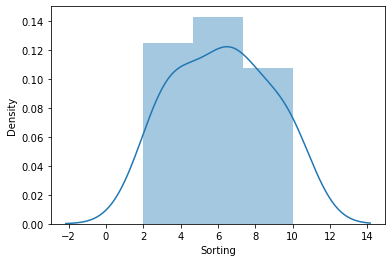

In [5]:
sns.distplot(df['Sorting'])

<AxesSubplot:xlabel='Delivery', ylabel='Density'>

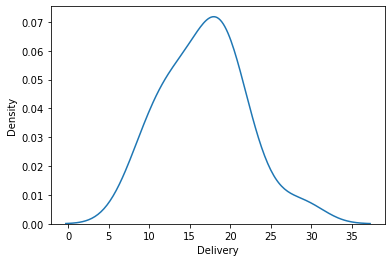

In [6]:
sns.kdeplot(df['Delivery'])

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

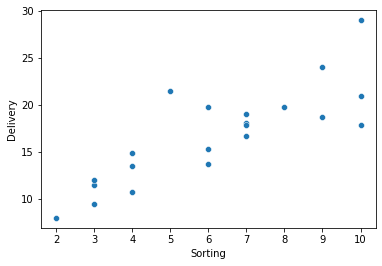

In [7]:
sns.scatterplot(df['Sorting'],df['Delivery'])

In [8]:
df.corr()

,Sorting,Delivery
Sorting,1.000000,0.825997
Delivery,0.825997,1.000000


<AxesSubplot:>

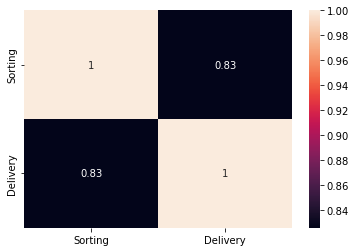

In [9]:
sns.heatmap(df.corr(), annot=True)

## Model building

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('Delivery~Sorting', data= df).fit()

In [12]:
c, m = model.params.round(2)
c, m

(6.58, 1.65)

## Line equation

In [13]:
x = 5
y = m * x + c
y

14.83

## R2 value

In [14]:
model.rsquared

0.6822714748417231

## Prediction for new data

In [15]:
newdf = pd.Series([1,11,15,21,31])
newdf = pd.DataFrame(data=newdf, columns=['Sorting'])
newdf

,Sorting
0,1
1,11
2,15
3,21
4,31


In [16]:
newdf['Delivery'] = model.predict(newdf).round(2)
newdf

,Sorting,Delivery
0,1,8.23
1,11,24.72
2,15,31.32
3,21,41.21
4,31,57.70
